In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
HMC_df = pd.read_csv('/Users/yinchiahuang/Library/Mobile Documents/com~apple~CloudDocs/CS677/Assignments/yinchia@bu.edu_hw1/HMC_Honda Motor Co., Ltd.csv')
SP500_df = pd.read_csv('/Users/yinchiahuang/Library/Mobile Documents/com~apple~CloudDocs/CS677/Assignments/yinchia@bu.edu_hw8/SP500.csv')

In [3]:
HMC = HMC_df.copy()
HMC.rename(columns={'Adj Close': 'HMC_Price'}, inplace = True) 
HMC = HMC[['Date', 'HMC_Price']]
HMC['HMC_return'] = HMC['HMC_Price'].pct_change() 

SP500 = SP500_df.copy()
SP500.rename(columns={'Adj Close': 'SP500_Price'}, inplace = True) 
SP500 = SP500[['Date','SP500_Price']]
SP500['SP500_return'] = SP500['SP500_Price'].pct_change() 

HMC_2017 = HMC.copy()
HMC_2017['Date'] = pd.to_datetime(HMC_2017['Date'])
start_date = '12-01-2017'
end_date = '12-31-2017'
mask = (HMC_2017['Date'] > start_date) & (HMC_2017['Date'] <= end_date)
HMC_2017 = HMC_2017.loc[mask]

SP500_2017 = SP500.copy()
SP500_2017['Date'] = pd.to_datetime(SP500_2017['Date'])
mask = (SP500_2017['Date'] > start_date) & (SP500_2017['Date'] <= end_date)
SP500_2017 = SP500_2017.loc[mask]


In [4]:
#HMC_2017

In [5]:
#SP500_2017

#### scatter plot of HMC return and S&P500 return

Text(0.5,1,'2017 December')

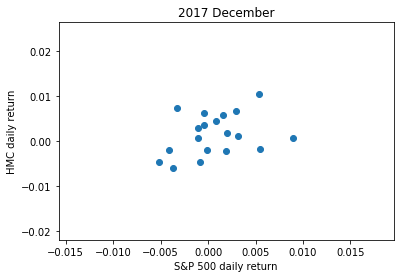

In [6]:
x = SP500_2017['SP500_return']
y = HMC_2017['HMC_return']

x = np.array(x)[:,np.newaxis]
y = np.array(y)[:,np.newaxis]


plt.scatter(x, y)
plt.xlabel('S&P 500 daily return')
plt.ylabel('HMC daily return')
plt.title('2017 December')

Text(0.5,1,'2017 December LinearRegression')

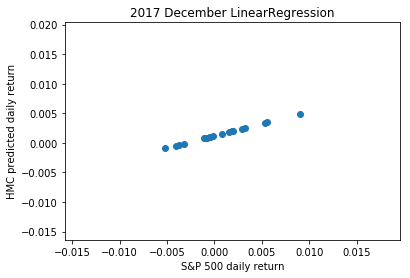

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x, y)


# Train the model using the training sets

predicted_y = model.predict(x)
#print(predicted_y)

plt.scatter(x, predicted_y)


plt.xlabel('S&P 500 daily return')
plt.ylabel('HMC predicted daily return')
plt.title('2017 December LinearRegression')


In [8]:
print("y-interception:",model.intercept_)
print("beta coefficients:", model.coef_)

y-interception: [0.00120363]
beta coefficients: [[0.41193081]]


#### Apply this equation for next month: January 2018

In [9]:
HMC_2018 = HMC.copy()
HMC_2018['Date'] = pd.to_datetime(HMC_2018['Date'])
start_date = '01-01-2018'
end_date = '01-31-2018'
mask = (HMC_2018['Date'] > start_date) & (HMC_2018['Date'] <= end_date)
HMC_2018 = HMC_2018.loc[mask]

SP500_2018 = SP500.copy()
SP500_2018['Date'] = pd.to_datetime(SP500_2018['Date'])
mask = (SP500_2018['Date'] > start_date) & (SP500_2018['Date'] <= end_date)
SP500_2018 = SP500_2018.loc[mask]


In [10]:
#HMC_2018

In [11]:
#SP500_2018 

- STEP 1. Actual returns for for your stock January: a1, ….., a20   
- STEP 2. Actual returns for S&P-500:x1, …. X20
- STEP 3. Compute predicted values: y1, …, y 20
- STEP 4. Compute MSE

In [12]:
a_list = HMC_2018["HMC_return"].tolist()
x_list = SP500_2018['SP500_return'].tolist()

x_array = np.array(x_list)[:,np.newaxis]
a_array = np.array(a_list)[:,np.newaxis]
y_array = model.predict(x_array)


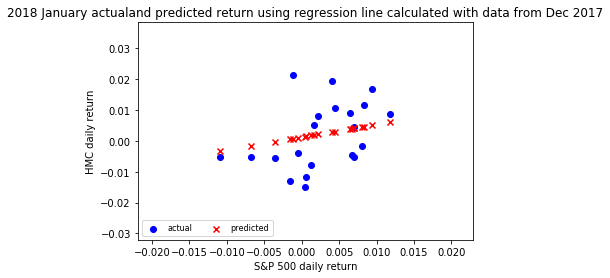

In [13]:
colors = ['b', 'r']

actual_plot = plt.scatter(x_list, a_list, marker='o', color=colors[0])
predicted_plot  = plt.scatter(x_list, y_array, marker='x', color=colors[1])

plt.legend((actual_plot, predicted_plot),
           ('actual', 'predicted'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)

plt.xlabel('S&P 500 daily return')
plt.ylabel('HMC daily return')
plt.title('2018 January actualand predicted return using regression line calculated with data from Dec 2017')

plt.show()

In [14]:
#Compute MSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(a_list ,y_array))
print("Use simple regression equation calculated by Dec,2017 daily return to predict Jan,2018's daily return:\nMSE =", rms)
rms

Use simple regression equation calculated by Dec,2017 daily return to predict Jan,2018's daily return:
MSE = 0.009771236226620295


0.009771236226620295

#### Leave One Out: Take the first point out, compute linear regression and apply it to predict that point

In [15]:
# Example: for first day, n=1, return on the stock was was 0.1. 
# You remove that point, compute the regression line on remaining points and use S&P return for that day to predict(x_1)

HMC_2017 = HMC_2017.reset_index()
SP500_2017 = SP500_2017.reset_index()
relative_error_dic = {}

for i in range(len(HMC_2017)):
    
    remove_x = SP500_2017.iloc[i,3]
    actual_y = HMC_2017.iloc[i,3]
    
    rows = [r for r in range(len(HMC_2017)) if r != i]

    x = SP500_2017.iloc[rows,3]
    x = np.array(x)[:,np.newaxis]
    
    y = HMC_2017.iloc[rows,3]
    y = np.array(y)[:,np.newaxis]

    model = LinearRegression(fit_intercept=True)
    model.fit(x, y)
    
    predicted_y = model.predict(remove_x)

    relative_error =  100* abs((predicted_y - actual_y) / actual_y)
    relative_error = round(relative_error[0][0],4)
    relative_error_dic[i]= relative_error
    print("i=", i, 'relative error=', relative_error)

relative_error_dic


i= 0 relative error= 30.5212
i= 1 relative error= 109.0627
i= 2 relative error= 163.8683
i= 3 relative error= 68.8818
i= 4 relative error= 346.7297
i= 5 relative error= 119.6319
i= 6 relative error= 71.7288
i= 7 relative error= 89.0484
i= 8 relative error= 90.5584
i= 9 relative error= 1118.8448
i= 10 relative error= 78.9232
i= 11 relative error= 115.1625
i= 12 relative error= 126.2785
i= 13 relative error= 15.9187
i= 14 relative error= 75.4457
i= 15 relative error= 78.7808
i= 16 relative error= 69.6986
i= 17 relative error= 195.5642
i= 18 relative error= 99.8156


{0: 30.5212,
 1: 109.0627,
 2: 163.8683,
 3: 68.8818,
 4: 346.7297,
 5: 119.6319,
 6: 71.7288,
 7: 89.0484,
 8: 90.5584,
 9: 1118.8448,
 10: 78.9232,
 11: 115.1625,
 12: 126.2785,
 13: 15.9187,
 14: 75.4457,
 15: 78.7808,
 16: 69.6986,
 17: 195.5642,
 18: 99.8156}

##### Plot the following graph: on X axis you have point 1, 2, 3, 4…  19   On Y axis, you will indicate “relative error”

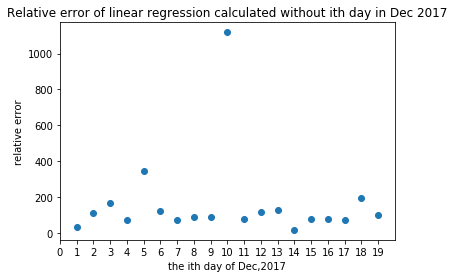

In [16]:
relative_error_list = relative_error_dic.items()
x, y = zip(*relative_error_list) # unpack a list of pairs into two tuples
x = list(i+1 for i in x)
plt.scatter(x, y)
plt.xlabel('the ith day of Dec,2017')
plt.ylabel('relative error')
plt.title('Relative error of linear regression calculated without ith day in Dec 2017')
plt.xlim(0, 20)
plt.xticks(np.arange(0, 20, 1))
plt.show()

- (1) Choose the values of alpha and beta that correspond to the minimum relative error
- (2) Use this linear regression to analyze data in January

In [17]:
# In this case, min() will return the element in that array whose second element (x[1]) is smaller than all of 
# the other elements' second elements. 
# Another way of phrasing it is as the function call implies: return the min element, using x[1] as the key.
min(relative_error_dic.items(), key=lambda x: x[1]) 

(13, 15.9187)

y-interception: [0.00121734]
beta coefficients: [[0.41356548]]
MSE = 0.009770308625838903


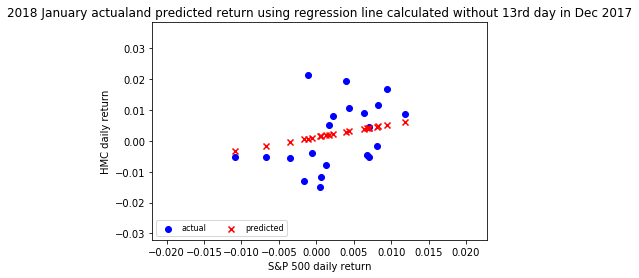

In [18]:
# the linear regression when removing i =13
i = 13
remove_x = SP500_2017.iloc[i,3]
actual_y = HMC_2017.iloc[i,3]
    
rows = [r for r in range(len(HMC_2017)) if r != i]

x = SP500_2017.iloc[rows,3]
x = np.array(x)[:,np.newaxis]
    
y = HMC_2017.iloc[rows,3]
y = np.array(y)[:,np.newaxis]

model = LinearRegression(fit_intercept=True)
model.fit(x, y)

print("y-interception:",model.intercept_)
print("beta coefficients:", model.coef_)
    
# Use this linear regression to analyze data in January
a_list = HMC_2018["HMC_return"].tolist()
x_list = SP500_2018['SP500_return'].tolist()

x_array = np.array(x_list)[:,np.newaxis]
a_array = np.array(a_list)[:,np.newaxis]

y_array = model.predict(x_array)

rms = sqrt(mean_squared_error(a_list ,y_array))
print("MSE =", rms)

### Visualize the result
colors = ['b', 'r']

actual_plot = plt.scatter(x_list, a_list, marker='o', color=colors[0])
predicted_plot  = plt.scatter(x_list, y_array, marker='x', color=colors[1])

plt.legend((actual_plot, predicted_plot),
           ('actual', 'predicted'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)

plt.xlabel('S&P 500 daily return')
plt.ylabel('HMC daily return')
plt.title('2018 January actualand predicted return using regression line calculated without 13rd day in Dec 2017')

plt.show()


- Is it true that if we get the “best” linear regression (using leave one out)? 
- Run each “reduced” linear regression for January and compute MSE

In [19]:
rms_dic = {}

for i in range(len(HMC_2017)):
    
    rows = [r for r in range(len(HMC_2017)) if r != i]
    
    x = SP500_2017.iloc[rows,3]
    x = np.array(x)[:,np.newaxis]
    
    y = HMC_2017.iloc[rows,3]
    y = np.array(y)[:,np.newaxis]

    model = LinearRegression(fit_intercept=True)
    model.fit(x, y)
    
    y_array = model.predict(x_array)
    
    # Use this linear regression to analyze data in January
    rms = round(sqrt(mean_squared_error(a_list ,y_array)),6)
    rms_dic[i]= rms
    print("i=", i, "MSE =", rms)
    

i= 0 MSE = 0.009773
i= 1 MSE = 0.009948
i= 2 MSE = 0.009795
i= 3 MSE = 0.009816
i= 4 MSE = 0.00969
i= 5 MSE = 0.009759
i= 6 MSE = 0.00978
i= 7 MSE = 0.009729
i= 8 MSE = 0.009821
i= 9 MSE = 0.00965
i= 10 MSE = 0.01
i= 11 MSE = 0.009621
i= 12 MSE = 0.009835
i= 13 MSE = 0.00977
i= 14 MSE = 0.00975
i= 15 MSE = 0.009747
i= 16 MSE = 0.009766
i= 17 MSE = 0.009764
i= 18 MSE = 0.009933


In [20]:
min(rms_dic.items(), key=lambda x: x[1]) 

(11, 0.009621)

Answer: No! The “best” linear regression (using leave one out) is when we remove the 13rd day of Dec, 2017. However, the smallest MSE among all regression applied on data in Jan,2018 is the one without the 11st day of Dec, 2017. 